# FINAL PROJECT -- ONLINE SHOPPER'S PURCHASE INTENTION

## TEAM PEERLESS

 
### Nimith Narapareddy -------- U64915972
### Pottumurthi Mani sai ------ U20468035
### Nandini Bethamcharla ------ U35263346
### Lakshmi Lavanya Javvadi --- U85351468
### Manohar Reddy Pasham ------ U51001133

# Bussiness Problem



#### One of the many sectors that data science has transformed is e-commerce, the act of purchasing and selling goods online. Increasing buy conversion rates—the proportion of website visitors who make a purchase at an online store—is one of the key objectives for e-commerce businesses. E-commerce businesses and academic researchers have worked hard to analyze and simulate the online consumers' behavior in order to attain this goal. Machine learning techniques are increasingly being used in research to forecast user behavior, particularly in recent years.

#### The collection of online buyers' intended purchases comprises of feature vectors from 12,330 sessions. In order to prevent any inclination to a certain campaign, special day, user profile, or timeframe, the dataset is created so that each session would belong to a different user over the course of a year. More than 85% of online transactions did not result in users making a purchase, which prevented the e-commerce company from making any money. This is a very serious problem that could adversely impact the company's market share in the future.

#### TOur ultimate goal is to assess the provided data and suggest/predict a plausible action plan for the business that it can use in conjunction with its marketing initiatives to boost the amount of online visitors who successfully complete their purchases. This will boost the company's ability to generate revenue and expand its market share.



# Importing all Required Libraries

In [1]:
## Importing all the necessary libraries

## To suppress warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
np.random.seed(0)   ## set random seed
import pandas as pd
import chardet
import os
import pickle
from collections import Counter

# For plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn packages (for pre-processing, model-building, evaluators, cross-validators, etc.)
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_auc_score, f1_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
# Imblearn packages (for over_sampling and imblearn pipelines)
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import Pipeline, make_pipeline  ## Using packages from imblearn.pipeline for making pipelines

## xgboost packages
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

## time and datetime
import datetime
import time


## Pandas DataFrame display options
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_seq_items', None) #For printing a long-sequence


# Description of the Data Set

##### The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.
##### The dataset consists of 10 numerical and 8 categorical attributes.The 'Revenue' attribute can be used as the class label.
##### Administrative: This is the number of pages of this type (administrative) that the user visited.
##### Administrative_Duration: This is the amount of time spent in this category of pages.
##### Informational: This is the number of pages of this type (informational) that the user visited.
##### Informational_Duration: This is the amount of time spent in this category of pages.
##### ProductRelated: This is the number of pages of this type (product related) that the user visited.
##### ProductRelated_Duration : This is the amount of time spent in this category of pages.
##### BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
##### ExitRates: The percentage of pageviews on the website that end at that specific page.
##### PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
##### SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized.


# Loading the dataset

In [2]:
df = pd.read_csv('./online_shoppers_intention.csv') #loading data

# Explore the dataset

In [3]:
df.head() # checking first 5 columns

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
## Check number of records and feature columns (df.shape)
df.shape

(12330, 18)

In [6]:
df.columns #chcecking column names

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
df.describe() #Statistical Summary of columns

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
## Observing different feature types present in the data (dataframe summary)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Cleaning the dataset 

In [9]:
df.columns = [s.strip().replace(' ', '_') for s in df.columns] #replacing colums names which has spaces with the "_"

### Here, we've added an underscore between each space to make the column names more accessible and trustworthy. This will look better and be more suitable.

In [10]:
np.sum(df.isnull())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
df.isna().sum() #Checking for null values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### From the above output, we could see that We do not have any NA values in dataset.

In [12]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

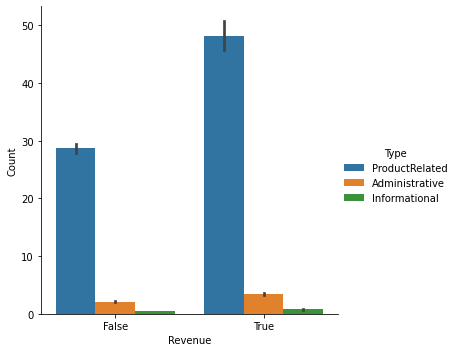

In [13]:
df1 = pd.melt(df[['ProductRelated','Administrative','Informational','Revenue']], id_vars='Revenue', var_name="Type", value_name="Count")
df1
sns.catplot(x='Revenue', y='Count', hue='Type', data=df1, kind='bar')


#Customers visited ProductRelated web page more as compared to Administrative and Informational.
#At this point of visual EDA it is becoming seemingly clear that Admin page is HOME page, Informational is CONTACT US
#and Product related is the actual webpage for the product in interest. This exclusive info was not provided in the dataset.


In [14]:
#Number of pages visited: Administrative, Informational, ProductRelated
#Percentages of webpages visited

page_time_cols = ["AdministrativeDuration","InformationalDuration","ProductRelatedDuration"]
page_count_cols = ["Administrative","Informational","ProductRelated"]
page_count = df[page_count_cols].groupby(df.Revenue).mean()
page_count

,Administrative,Informational,ProductRelated
Revenue,,,
False,2.117732,0.451833,28.714642
True,3.393606,0.786164,48.210168


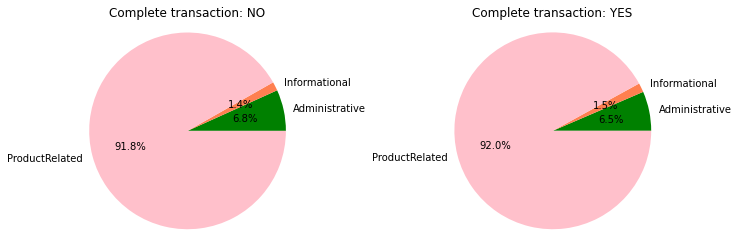

In [15]:
plt.figure(figsize=(12, 4))
                   
plt.subplot(1,2,1)
plt.pie(page_count.iloc[0,:], labels=page_count.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['green', 'coral', 'pink'])
plt.axis('equal')
plt.title('Complete transaction: NO')

plt.subplot(1,2,2)
plt.pie(page_count.iloc[1,:], labels=page_count.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['green', 'coral', 'pink'])
plt.axis('equal')
plt.title('Complete transaction: YES')

plt.show()


#People visit product related pages more rather than Admin or Informational which is obvious
#as user intends to purchase rather than just read admin and info pages on the website.

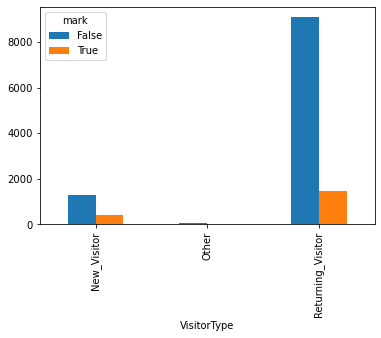

In [16]:
#Revenue vs VisitorType
ct = pd.crosstab(df.VisitorType,df.Revenue)
ct.plot.bar()
plt.legend(title='mark')

#Inference from below
#Most of the customers visiting the website are Returning visistors, contributing to most number of purchases.
#About 1/4th of New_visitors made the purchase as compared to ~15 % of Returning visitors.

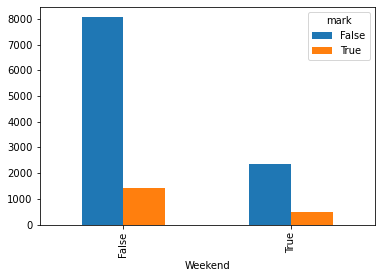

In [17]:
#Weekend vs Revenue

ct1 = pd.crosstab(df.Weekend,df.Revenue)
ct1.plot.bar()
plt.legend(title='mark')

#It is evident from below that even though the no of visitors in weekdays are more compared to weekends but 
#there is no significant difference in conversion to Revenue rates.

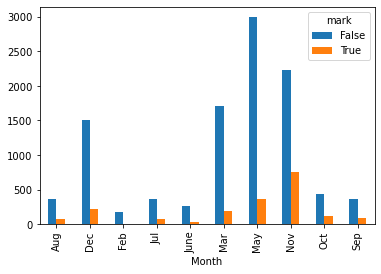

In [18]:
#Month vs Revenue

ct2 = pd.crosstab(df.Month,df.Revenue)
ct2.plot.bar()
plt.legend(title='mark')

#Insights from below
#Most of the customers visited the website in the month of May and Nov with pretty much similar conversion to Revenue ratio.
#Highest number of purchases have been made in the month of November.
#Website is least visited by customers in the month of Feb and also the purchase is negligible as compared to other months.

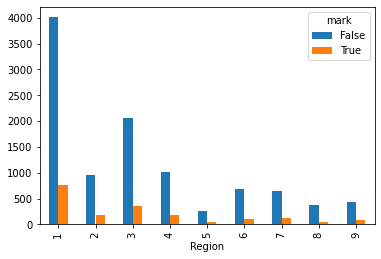

In [19]:
#Region vs Revenue

ct4 = pd.crosstab(df.Region,df.Revenue)
ct4.plot.bar()
plt.legend(title='mark')

#Most revenue is generated from Region 1 followed by region 3.
#Regions 5 and 8 have negligble contribution in revenue generation.

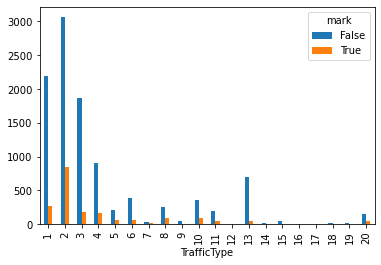

In [20]:
#TrafficType vs Revenue

ct5 = pd.crosstab(df.TrafficType,df.Revenue)
ct5.plot.bar()
plt.legend(title='mark')

#Most revenue is generated by traffic type 2, followed by 1 and 3.
#TRafffic type 14-20 have very less contribution to Revenue.

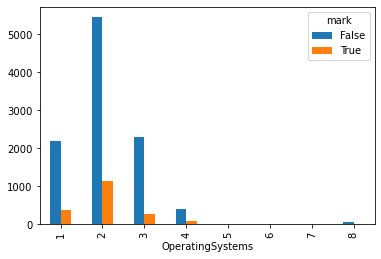

In [21]:
#OS vs REvenue

ct6 = pd.crosstab(df.OperatingSystems,df.Revenue)
ct6.plot.bar()
plt.legend(title='mark')

#People using OS type 2 generate majority of revenue.

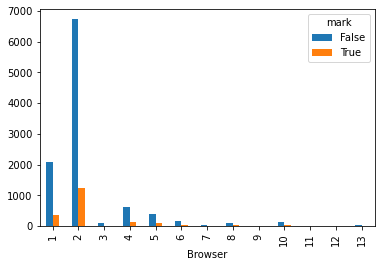

In [22]:
#Browser vs Revenue


ct7 = pd.crosstab(df.Browser,df.Revenue)
ct7.plot.bar()
plt.legend(title='mark')

#Most revenue is generated from browser 2 and 1.No contribution from browsers 3,9,11,12,13.

Text(0.5, 1.0, 'Monthly visits of the users on the website')

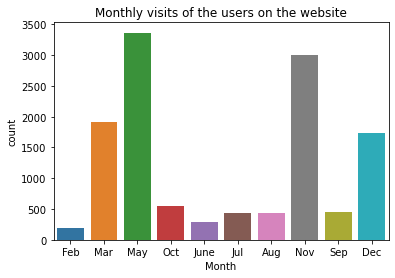

In [23]:
#Visits to the website on each month

sns.countplot(x="Month",data=df)
plt.title("Monthly visits of the users on the website")

#People visited the website in the month of May and Nov the most.

In [24]:
#Demographics of visitors: VisitorType, Region

freq1 = df.VisitorType.groupby(df.Revenue).value_counts()
freq1 = freq1.unstack(level='Revenue').fillna(0).transpose()
print(freq1)

VisitorType  New_Visitor  Other  Returning_Visitor
Revenue                                           
False               1272     69               9081
True                 422     16               1470


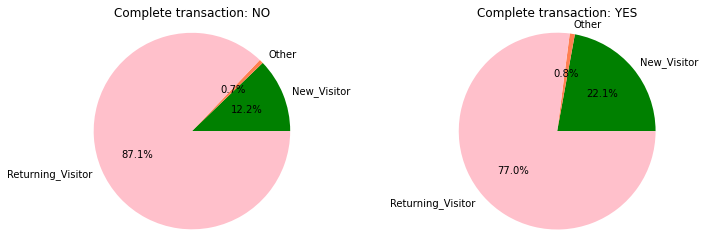

In [25]:
plt.figure(figsize=(12, 4))
                   
plt.subplot(1,2,1)
plt.pie(freq1.iloc[0,:], labels=freq1.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['green', 'coral', 'pink'])
plt.axis('equal')
plt.title('Complete transaction: NO')

plt.subplot(1,2,2)
plt.pie(freq1.iloc[1,:], labels=freq1.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['green', 'coral', 'pink'])
plt.axis('equal')
plt.title('Complete transaction: YES')

plt.show()

#New visitors take up a larger percentage in those who complete purchase,
#while there are more returning visitors among those who do not complete the purchase.

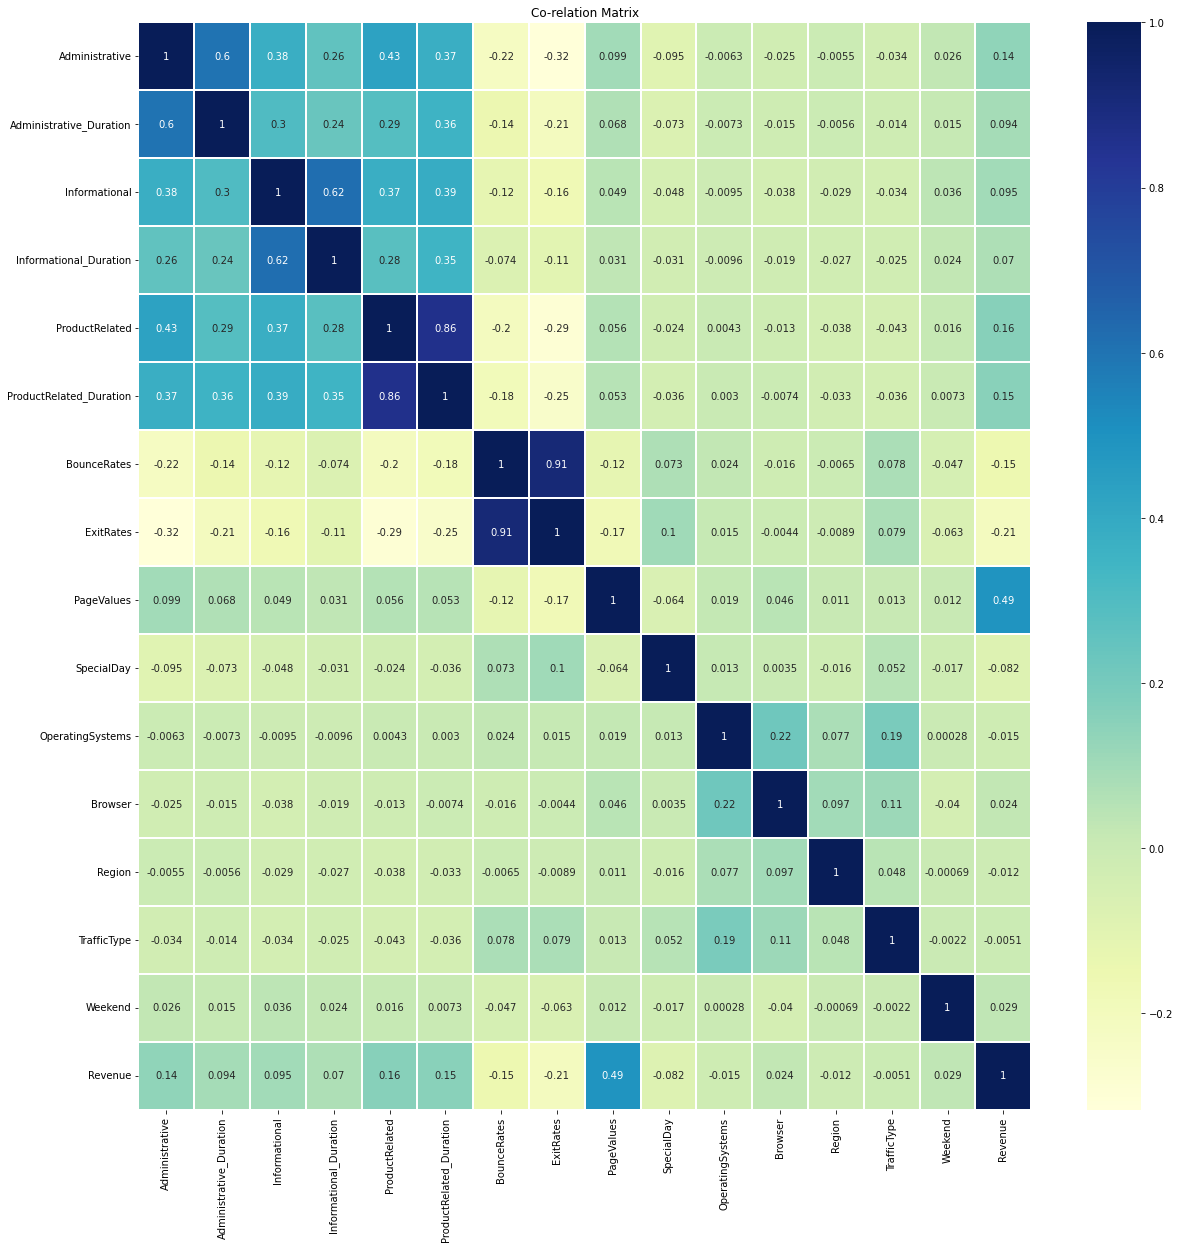

In [26]:
#create the correlation matrix heat map
#Calculate the correlation coefficients

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.title('Co-relation Matrix')
plt.show()

In [27]:
#Checking which columns and rows contain missing/NA values
pd.set_option('display.max_rows', 25)
null_columns=df.columns[df.isnull().any()]
print(df.loc[df.isnull().any(axis=1)][null_columns])

Empty DataFrame
Columns: []
Index: []


# Transforming the data

In [28]:
Category_Features=['VisitorType','Month']

#### In order to make it possible to discover the relationship between the variables, we are combining all the object type variables into a list and changing their datatype to category.

In [29]:
#lopping through every category.
for i in Category_Features+['Revenue']:
    df[i] = df[i].astype('category') #Casting from object class to category class.
df.dtypes #Cheching all columns Data types.

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                category
Weekend                        bool
Revenue                    category
dtype: object

In [30]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder() #Creating instace of OrdinalEncoder.
for i in Category_Features:
    df[i]=enc.fit_transform(df[[i]]) #Coverting to numerical.
df.dtypes #Checking all columns Data types.


Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                       float64
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                 float64
Weekend                        bool
Revenue                    category
dtype: object

#### Here, we will perform the ordinal encoding on the predictor categorical variable to encode them to numerical.

In [31]:
from sklearn.preprocessing import LabelEncoder
target = 'Revenue'
predictors = list(df.columns) #Assigning Predictors and coverting pandas series object to list.
predictors.remove(target)
#LableEncoding for target variable
enc = LabelEncoder() 
df[target]=enc.fit_transform(df[target])
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                      float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                float64
Weekend                       bool
Revenue                      int32
dtype: object

#### Performing Label encoding on the target variables to turn the categorical variables to numerical.

# Splitting the data into training and testing validation sets

In [32]:
X=df[predictors]
y=df[target]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

### Here, the data are divided into training and test groups. 70% of the population's data are used for training, while the remaining 30% are used for testing.

<AxesSubplot:xlabel='Revenue', ylabel='count'>

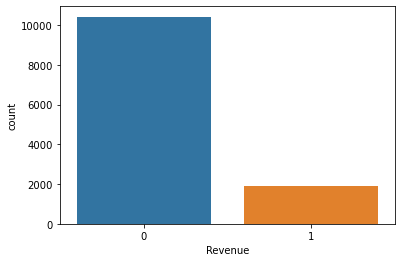

In [33]:
#Checking share of completed purchases

sns.countplot(data=df,x="Revenue")

#roughly around 20% of the sessions only resulted in completed purachase.
#imbalanced dataset might have to do something about it before model building.

### We undersampled the data to prevent discrepancies between observations for the target since the data are not balanced with respect to the target variable.

# Data Balancing

In [34]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
train_X, train_y = undersample.fit_resample(train_X, train_y)
train_y.value_counts()

0    1286
1    1286
Name: Revenue, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split # For splitting the data in to training and testing we import this library.
train_df,test_df = train_test_split(df,test_size=0.3,random_state=1) # Here we are splitting the data in to 70 percent in to training set and 30 percent in to testing set

In [36]:
train_df_y=train_df['Revenue']
train_df_x= train_df.drop(columns=['Revenue'])

In [37]:
Y_label = 'Revenue' # Target variable
X_label = list(df.columns) # Input variables
X_label.remove(Y_label)
# using random under_sampling for handling data imbalance.
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rand_samp = RandomUnderSampler()
ind_X, dep_Y = rand_samp.fit_resample(train_df[X_label],train_df[Y_label])
train_df=pd.concat([ind_X,dep_Y],axis=1,join="inner")
train_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,14,115.666667,0.057143,0.076190,0.0,0.0,6.0,3,2,1,13,2.0,False,0
1,0,0.0,0,0.0,9,1217.200000,0.033333,0.040741,0.0,0.0,6.0,1,1,5,4,2.0,False,0
2,2,180.0,3,258.0,61,5233.590476,0.009091,0.035240,0.0,0.0,6.0,2,2,4,4,2.0,False,0
3,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,5.0,1,1,8,1,2.0,False,0
4,0,0.0,0,0.0,2,69.000000,0.000000,0.050000,0.0,0.0,6.0,3,2,3,3,2.0,False,0


Text(0.5, 1.0, 'revenue')

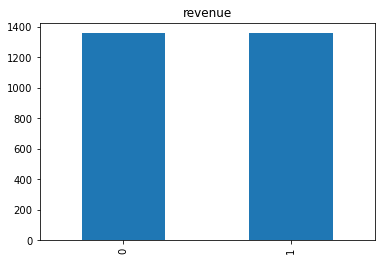

In [38]:
train_df['Revenue'].value_counts().plot(kind='bar').set_title('revenue')

In [39]:
for i in Category_Features: #Removing 
    predictors.remove(i)
predictors #Checking Predictors list.
train_X[predictors]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,0,0.000000,0,0.0,12,169.300000,0.000000,0.016667,0.000000,0.0,2,2,3,2,True
1,0,0.000000,0,0.0,5,75.600000,0.000000,0.000000,0.000000,0.0,1,1,3,4,True
2,0,0.000000,0,0.0,6,77.000000,0.000000,0.016667,0.000000,0.6,2,2,2,4,False
3,1,21.200000,0,0.0,0,0.000000,0.050000,0.100000,0.000000,0.0,1,1,1,5,False
4,0,0.000000,0,0.0,12,168.000000,0.041667,0.063889,0.000000,0.0,2,2,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,1,32.333333,1,56.0,62,2414.900000,0.000000,0.002222,30.461587,0.0,2,2,9,2,False
2568,4,68.666667,0,0.0,14,617.150000,0.000000,0.004444,9.253162,0.0,1,1,6,5,False
2569,0,0.000000,0,0.0,11,192.450000,0.036364,0.040909,27.315105,0.0,3,2,1,1,True
2570,3,33.000000,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,2,2,1,2,False


#  Standardzation of quantitative features

In [40]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(train_X[predictors])

# Transform the predictors of training, validation and newCustomer
train_scaled_data= scaler.transform(train_X[predictors])
test_scaled_data = scaler.transform(test_X[predictors])


In [41]:
s=0
for i in predictors:
    train_X[i]=train_scaled_data[:,s]
    test_X[i]=test_scaled_data[:,s]
    s=s+1
train_X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.582471,-0.399198,-0.348600,-0.240230,-0.323109,-0.456195,-0.595951,-0.679164,-0.492856,-0.292174,5.0,-0.100183,-0.219063,-0.036092,-0.511543,2.0,1.814889
1,-0.582471,-0.399198,-0.348600,-0.240230,-0.477217,-0.508502,-0.595951,-0.913308,-0.492856,-0.292174,8.0,-1.178298,-0.808427,-0.036092,0.022530,2.0,1.814889
2,-0.582471,-0.399198,-0.348600,-0.240230,-0.455201,-0.507721,-0.595951,-0.679164,-0.492856,2.910124,6.0,-0.100183,-0.219063,-0.456128,0.022530,2.0,-0.550998
3,-0.262975,-0.267136,-0.348600,-0.240230,-0.587294,-0.550705,0.057862,0.491557,-0.492856,-0.292174,8.0,-1.178298,-0.808427,-0.876163,0.289566,2.0,-0.550998
4,-0.582471,-0.399198,-0.348600,-0.240230,-0.323109,-0.456920,-0.051107,-0.015755,-0.492856,-0.292174,7.0,-0.100183,-0.219063,-0.876163,-0.778579,2.0,-0.550998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,-0.262975,-0.197782,0.523578,0.225805,0.777660,0.797399,-0.595951,-0.882089,0.578694,-0.292174,6.0,-0.100183,-0.219063,2.484123,-0.511543,2.0,-0.550998
2568,0.695512,0.028551,-0.348600,-0.240230,-0.279078,-0.206185,-0.595951,-0.850870,-0.167357,-0.292174,9.0,-1.178298,-0.808427,1.224016,0.289566,0.0,-0.550998
2569,-0.582471,-0.399198,-0.348600,-0.240230,-0.345124,-0.443271,-0.120450,-0.338591,0.468010,-0.292174,8.0,0.977933,-0.219063,-0.876163,-0.778579,2.0,1.814889
2570,0.376016,-0.193629,-0.348600,-0.240230,-0.213032,-0.334990,-0.595951,-0.772822,-0.492856,-0.292174,1.0,-0.100183,-0.219063,-0.876163,-0.511543,0.0,-0.550998


In [42]:
Algorithms = ['knn','knn','DecisionTree','DecisionTree','RandomForest','RandomForest','AdaBoostClassifier','AdaBoostClassifier','GradientBoosting','GradientBoosting','XGBClassifier','XGBClassifier','LogisticRegression','LogisticRegression']
Recall_values =[]

#### Since continuous variables are measured using several scales, standardization was used to convert them to the same scale. On the train predictors and validation predictors in this case, we carried out the same action. First, as standardization should not be performed on categorical variables or the target variable, they have been eliminated. Later, we'll add that list of category features to the common dataframe. We finally receive a dataframe that is uniform.

#### False Positive: The model projected that the customer would subscribe to the product, but the actual result was that they did not. The risk in this situation is that the marketing team will focus on customers who shouldn't be targeted. The campaign team wastes time and resources, and the client is inundated with pointless advertisements.

#### False negative: Although the model projected that the customer would not subscribe to the product, the actual result was that they did. As a result of losing one of their investors for the product, the bank will incur a sizable loss.

#### We have less loss with false positives than with false negatives, so FP is preferred here over FN.

# Prediction with K-NN

In [43]:
knn = KNeighborsClassifier()
_ = knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))

Using default parameters : Recall score:
0.8473


#### On our training dataset, which is essentially a split of the original dataset, we used the K-nn model and discovered that the recall value was 0.8473.

In [44]:
%%time
from sklearn.model_selection import GridSearchCV
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
     'n_neighbors': list(range(1,round(np.sqrt(len(df))),2)),
    'metric': ['euclidean', 'cosine','manhattan','minkowski'],
    'weights':['uniform','distance']
}
best_grid_search_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1,error_score='raise')  # n_jobs=-1 will utilize all available CPUs 
_=best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)

Best_recall_knn = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

recall score:  0.8802749515503876
parameters:  {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: total: 2.41 s
Wall time: 31.9 s


#### The optimal value of k is discovered to be at k=1 with a recall of about 88%, according to the aforementioned observations. After doing k fold, recall is improved compared to before, indicating improved model performance.

# Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(test_y, y_pred)
print(cm)

[[1761 1316]
 [  95  527]]


In [46]:
TP = cm[1, 1] # True Positives
TN = cm[0, 0] # True Negatives
FP = cm[0, 1] # False Positives
FN = cm[1, 0] # False Negatives

# Precision

In [47]:
precision = TP / (TP + FP)
print(f"{precision:.4f}")

0.2859


# Recall

In [48]:
recall = TP / (TP + FN)
print(f"{recall:.4f}")

0.8473


# F1 Score

In [49]:
f1_Score = (2 * precision * recall) / (precision + recall)
print(f"{f1_Score:.4f}")

0.4276


# Accuracy

In [50]:
print(accuracy_score(test_y, y_pred))

0.6185455528521222


# Correlation Matrix for Analysing the parameters and access

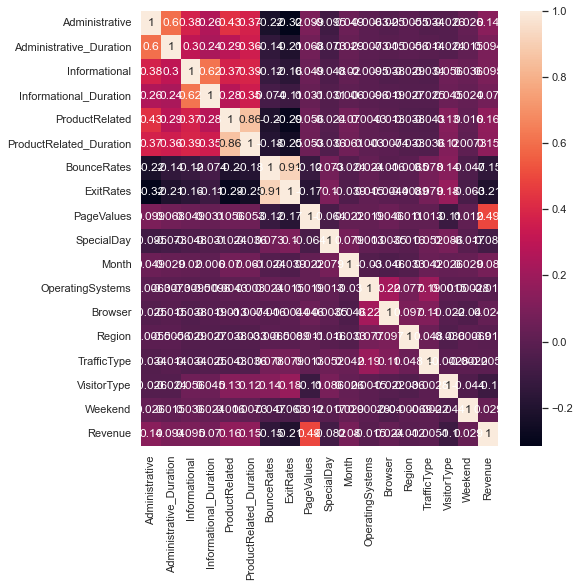

In [51]:
import seaborn as sns
sns.set()
plt.figure(figsize=(8,8))
p=sns.heatmap(df.corr(), annot=True) 

In [52]:
# create the training set and the test set 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [53]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
train_X, train_y = undersample.fit_resample(train_X, train_y)
train_y.value_counts()

0    1358
1    1358
Name: Revenue, dtype: int64

# Decision Tree 

In [54]:
#Decision Tree 
dtree=DecisionTreeClassifier(random_state=3)
_ = dtree.fit(train_X, train_y)
y_pred = dtree.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))

Using default parameters : Recall score:
0.9491


In [55]:
%%time
score_measure = 'recall'
k_fold = 10

param_grid = {

    'criterion':  ['gini','entropy','log_loss'],
    'max_depth':  [2]+list(range(5,50,5)),
     'min_samples_leaf': range(2,len(train_X.columns),1) , 
     'min_samples_split': range(2,len(train_X.columns),1)
    

}

best_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=k_fold, n_jobs=-1,verbose=1,scoring=score_measure)

_ = best_grid_search_model.fit(train_X, train_y)

print(score_measure, 'score: ', best_grid_search_model.best_score_)

print('parameters: ', best_grid_search_model.best_params_)
Best_recall_DT = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

Fitting 10 folds for each of 6750 candidates, totalling 67500 fits
recall score:  0.966132897603486
parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}
CPU times: total: 32.9 s
Wall time: 2min 51s


#### The recall for the decision tree is determined to be approximately 94%, and after conducting k-fold it enhanced its recall rate from 94% to 96%. Here, after completing the analysis on the splitted data, we were able to determine the worth of the performance metrics. Although this model required more computing time than the ones above, it produced the best results compared to the earlier models.

# Confusion Matrix

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)
dec_pred=clf.predict(test_X)
cm = confusion_matrix(test_y, dec_pred)
print(cm)

[[1333 1816]
 [  29  521]]


In [57]:
TP = cm[1, 1] # True Positives
TN = cm[0, 0] # True Negatives
FP = cm[0, 1] # False Positives
FN = cm[1, 0] # False Negatives

In [58]:
precision = TP / (TP + FP)
print(f"{precision:.4f}")

0.2229


In [59]:
recall = TP / (TP + FN)
print(f"{recall:.4f}")

0.9473


In [60]:
f1_Score = (2 * precision * recall) / (precision + recall)
print(f"{f1_Score:.4f}")

0.3609


# Random Forest

In [61]:
#Random Forest
rforest = RandomForestClassifier(random_state=1)
_ = rforest.fit(train_X, train_y)
y_pred = rforest.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))

Using default parameters : Recall score:
0.9691


In [62]:
%%time
score_measure = 'recall'
k_fold = 10

param_grid = {
    "n_estimators": range(20,60,20),
    'max_features':['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
    'max_depth': [20,40],
    'bootstrap': [True],

         }
best_grid_search_model = GridSearchCV(estimator=RandomForestClassifier(random_state=1), 
                                    scoring=score_measure, param_grid=param_grid, cv=k_fold, verbose=1,  n_jobs = -1,error_score='raise')
_ = best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_recall_RF = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
recall score:  0.963937908496732
parameters:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
CPU times: total: 1.53 s
Wall time: 15.9 s


#### To see if we can get even better results, we are running random forest on the dataset.
#### Here, we have utilized the following parameters:
#### 1. Bootstrap: It accepts either true or false as values. If this is the case, each tree is constructed using the split data.
#### 2. Before calculating the maximum averages of the predictions, we want to build the number of trees (n estimators). Even while having more trees helps performance, the code will run more slowly as a result. The best range chosen is 20 to 100.
#### 3. max features: The most features that a single tree in Random Forest may attempt.
#### 4. max depth: In this case, the distance between a list's root node and leaf node was taken into account.
#### 5.The bare minimum number of samples required at a leaf node is indicated by the term min samples leaf.
#### The bare minimum of samples necessary to separate an internal node is represented by the variable min samples split.
#### We could identify the best model at the'max depth': 20,'max features': 0,', and 'n estimators': 20 with an recall score of 0.963937908496732 by executing the Random forest function and setting all of these parameters.

# AdaBoostClassifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=3)
_ = adaboost.fit(train_X, train_y)
y_pred = adaboost.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))



Using default parameters : Recall score:
0.9564


In [64]:
%%time
score_measure = 'recall'
k_fold = 10
param_grid = {
             'learning_rate': [0.7,0.8,0.9,1.0],
           'n_estimators': range(1,50,1)
              }
best_grid_search_model = GridSearchCV(estimator=AdaBoostClassifier(random_state=3),
                                    scoring=score_measure, param_grid=param_grid, cv=k_fold, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_recall_AdaBoost = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

Fitting 10 folds for each of 196 candidates, totalling 1960 fits
recall score:  0.9676252723311547
parameters:  {'learning_rate': 0.8, 'n_estimators': 14}
CPU times: total: 3.23 s
Wall time: 44 s


#### Recall score for the default Adaboost model is 0.9047698240885435. Using the two most important variables, n estimators and learning rate, we customized adaboost.
#### Before calculating the maximum averages of the predictions, we wish to build the following number of trees: #### n estimators. #### Even while having more trees helps performance, the code will run more slowly as a result. We've selected a good range of 1 to 50.
#### learning rate: The learning rate, which by default is set to 1, represents the weights' contribution from each model. The weights are gently raised or dropped when the learning rate is slowed down, which makes the model train move more slowly (but sometimes resulting in better performance scores).
#### We got the best model after doing hyperparameter tweaking with a k-fold value of 10. and parameters learning_rate': 0.8, 'n_estimators': 14 and recall score of 0.9676252723311547

# GradientBoosting

In [65]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier(random_state=3)
_ = gboost.fit(train_X, train_y)
y_pred = gboost.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))



Using default parameters : Recall score:
0.9655


In [66]:
%%time
score_measure = 'recall'
k_fold = 10
param_grid ={ 'n_estimators' : [25, 50 ,75, 100, 200],
              'learning_rate': [0.005 ,0.05, 0.5, 1.5,2],
              'max_depth': [2, 4, 6, 8],
              }
best_grid_search_model = GridSearchCV(estimator=GradientBoostingClassifier(random_state=3), 
                                    scoring=score_measure, param_grid=param_grid, cv=k_fold, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_recall_GB = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
recall score:  0.9668899782135076
parameters:  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}
CPU times: total: 3.69 s
Wall time: 2min


#### A potent method for creating predictive models is gradient boosting. It can profit from regularization techniques that punish various algorithmic components and enhance algorithm performance by lowering overfitting.
#### adjusting n estimators, Maximum depth and learning rate:
 #### The variable n estimators keeps track of the number of trees we include in the model. Processing multiple trees computationally can be expensive. For example, a 10-fold decrease in learning rate should result in a roughly 10-fold rise in n estimators. In general, n estimators should be adjusted to match changes in learning rate.

 #### Since the best n estimators ended up being 100, it would seem that the low learning rate value of 0.05 predicted that the n estimators value would be large.

 #### max depth T: his demonstrates the potential depth of the created tree. The more splits a tree has, the more information it collects about the data's structure.

#### The recall score for the Gradient Boosting model was 0.9655 and it has a tendency to overfit the data. After doing hyperparameter tuning, we obtained the best model with the following parameters:'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200 and recall score': 0.9668899782135076.

# XGBClassifier

In [67]:
#XGBClassifier
xgboost = XGBClassifier(random_state=1)
_ = xgboost.fit(train_X, train_y)
y_pred = xgboost.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))



[22:48:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Using default parameters : Recall score:
0.9691


In [68]:
%%time
score_measure = 'recall'
k_fold = 10
param_grid = {
            
    'n_estimators': [80, 100, 250, 500, 750],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 6, 10, 15],
            
}

           
best_grid_search_model = GridSearchCV(estimator=XGBClassifier(random_state=1), 
                                    scoring=score_measure, param_grid=param_grid, cv=k_fold, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_recall_XGB = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[22:53:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
recall score:  0.9676252723311547
parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
CPU times: total: 3.8 s
Wall time: 5min 19s


#### Extreme Gradient Boosting is a distributed, scalable gradient-boosted decision tree (GBDT) machine learning framework (XGBoost). The best machine learning program for regression, classification, and ranking tasks, it offers parallel tree boosting.
#### Maximal depth, learning rate, and n estimators were all used in this case. The term "max depth" refers to the tree's deepest point. The amount of fresh trees incorporated in the model can be controlled using the learning rate parameter. The term "n estimators" refers to the quantity of runs that the model will try to learn from. After hypertuning, the parameters should be set to have the following values: learning rate = 0.1, max depth = 3, and n estimators = 100. Consequently, we learned that the recall was 0.9676252723311547.

# LogisticRegression

In [69]:
logClassifier=LogisticRegression(random_state=1)

_ = logClassifier.fit(train_X,train_y)
y_pred = logClassifier.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))

Using default parameters : Recall score:
0.9527


In [70]:
%%time
score_measure = 'recall'
k_fold = 10
param_grid = { 'solver': ['liblinear'],
                      'penalty': ['l1', 'l2',], # NOTE: 'elasticnet' is only supported by 'saga' solver
                      'C': [100, 10, 1.0],
                      'max_iter': [1000,2500, 5000] # number of iterations to converge (sometimes the default is not enough - and sometimes, it will never converge)
                     }




best_grid_search_model = GridSearchCV(estimator=LogisticRegression(random_state=1),
                                    scoring=score_measure, param_grid=param_grid, 
                                    cv=k_fold, verbose=0,  n_jobs = -1,error_score='raise')
_ = best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_recall_logistic = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

recall score:  0.9506753812636164
parameters:  {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
CPU times: total: 281 ms
Wall time: 3min 26s


### To find the best parameters, we have performed tuning for the following variables:
#### C - float, default=1.0 Inverse of regularization strength; must be a positive float.
#### penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=l2
 
            1. none: no penalty is added;
            2. l2: add a L2 penalty term and it is the default choice;
            3. l1: add a L1 penalty term;
            4. elasticnet: both L1 and L2 penalty terms are added.
#### solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

            1. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
            2. For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
            3. liblinear is limited to one-versus-rest schemes.
        
#### max_iterint, default=100 ,Maximum number of iterations taken for the solvers to converge.

#### After performing hyperparameter tuning when k-fold value is 10, we got the best model at'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear' with recall score:0.9506753812636164. 

In [71]:
print("Recall scores...")
print(f"{'K-NN:':11}          {Best_recall_knn}")
print(f"{'Decision Tree:':11}       {Best_recall_DT}")
print(f"{'Random Forest:':11}       {Best_recall_RF}")
print(f"{'Ada Boosted:':11}         {Best_recall_AdaBoost}")
print(f"{'GradientBoosting:':11}    {Best_recall_GB}")
print(f"{'XGBoost:':11}          {Best_recall_XGB}")
print(f"{'LogisticRegression:':11}  {Best_recall_logistic}")

Recall scores...
K-NN:                0.8802749515503876
Decision Tree:       0.966132897603486
Random Forest:       0.963937908496732
Ada Boosted:         0.9676252723311547
GradientBoosting:    0.9668899782135076
XGBoost:             0.9676252723311547
LogisticRegression:  0.9506753812636164


In [72]:
score_df = pd.DataFrame(list(zip(Algorithms, Recall_values)),
               columns =['Algorithm', 'Recall'])
score_df
score_df['state']=['Default','After_tunning']*7

In [73]:
score_df

,Algorithm,Recall,state
0,knn,0.847267,Default
1,knn,0.880275,After_tunning
2,DecisionTree,0.949091,Default
3,DecisionTree,0.966133,After_tunning
4,RandomForest,0.969091,Default
5,RandomForest,0.963938,After_tunning
6,AdaBoostClassifier,0.956364,Default
7,AdaBoostClassifier,0.967625,After_tunning
8,GradientBoosting,0.965455,Default
9,GradientBoosting,0.966890,After_tunning


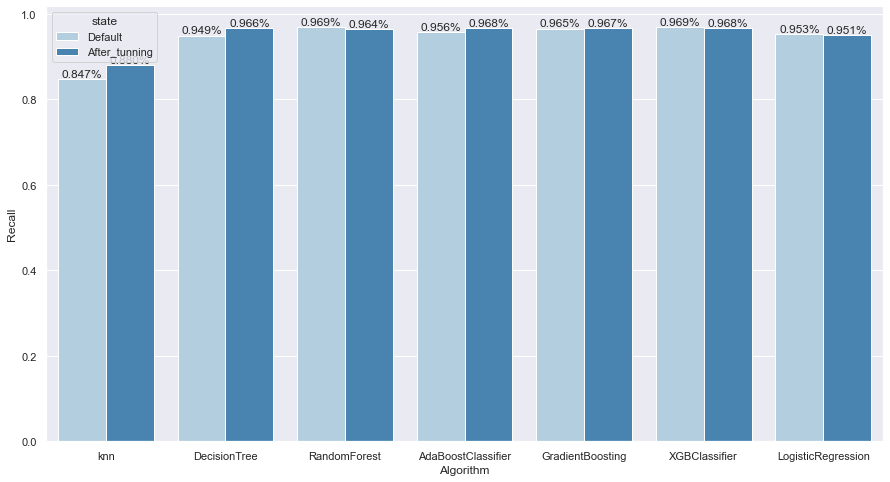

In [74]:
sns.set(rc = {'figure.figsize':(15,8)})
ax= sns.barplot(x = 'Algorithm',
            y = 'Recall',
            hue='state',
            data = score_df,palette = "Blues",ci=None)
for i in ax.containers:
     ax.bar_label(i,fmt='%.3f%%')
# Show the plot
plt.show()

#### With the help of the aforementioned table and graph, we were able to draw a conclusion and determine the overall recall score that was obtained after evaluating the model. We discovered that XGBoost classifier, offers the best outcome of all, with a recall score of 0.9676252723311547.

# Business Conclusion

 #### We are concentrating on the recall in this case since FP is superior to FN. Applying the XGBoost classifier Model is found to be enhancing recall and also produces the best results in this case.
 #### We have discovered that the recall of the models has improved as a result of implementing K- Fold cross validation and hyper parameter adjustment.
 #### XGBoost classifier proved to be the superior model overall. In conclusion, techniques like K- Fold cross validation and hyper parameter tweaking are very helpful in raising the caliber of outputs for the development of binary classification models.
 #### Most of the actual positives were obtained by the XGBoost classifier approach. This will enable the investors or the owners to reduce its marketing expenses and increase its income by targeting the appropriate clients who are most likely to purchase the products.
 #### After using the support vector machines technique, the previously mentioned individuals who worked on this business challenge had a recall score of 79%, according to earlier research of the problem. We improved it even more from a comparative standpoint and discovered a greater recall score than in earlier research.